In [ ]:
import sys
sys.path.append('/home/amit/Documents/ML/python_ML_RASCHKA/chap2/')
from utilities import plot_decision_regions, get_iris

import numpy as np

In [4]:
# Although feature scaling may be desired for visualization purposes,
# Note that FEATURE SCALING IS NOT A REQUIREMENT FOR DECISION TREE ALGORITHMS

X_train, X_test, y_train, y_test = get_iris(standarized=False)

In [7]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

In [13]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [14]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)

In [15]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [19]:
plot_decision_regions(X_combined, y_combined,
                      classifier= tree, 
                      test_idx = range(105,150))

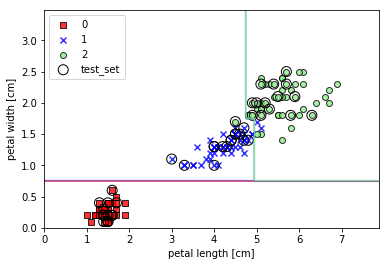

In [20]:
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc ='upper left')
plt.show()

__Note:__ <font style='color:#3385ff;font-size:16px;font-family: verdana;'>Decision tree can build complex decision boundaries by dividing the features space into rectangles.</font><br> However, we need to be careful since deeper the decision tree, the more complex the boundary becomes, which result in overfitting.

In [21]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)

In [22]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [23]:
plot_decision_regions(X_combined, y_combined,
                      classifier= tree, 
                      test_idx = range(105,150))

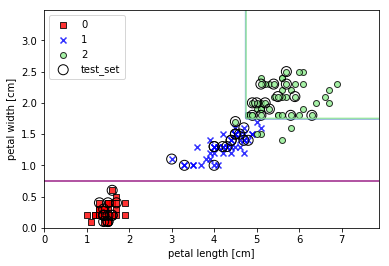

In [24]:
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc ='upper left')
plt.show()

### RANDOM FOREST


- Random Forest can be considered as an __ensemble__ of decision trees.
- <font style='color:#3385ff;font-size:16px;font-family: verdana;'>The idea is to average multiple(deep) of decision trees __that individually suffer from high variance__, to build a more __robust model__ that has a __better generalization performance and less susceptible to overfitting.__</font>

##### Random Forest Algorithm

1. Draw a random __bootstrap__ sample of size n (randomly choosen _n_ samples form the training set with replacement).
2. Grow a decision tree from the bootstap samples. At each node.<br>
> a. Randomly select _d_ features without replacement.<br>
> b. Split the node using the feature that provides the best split according to the objective function, for instance, __maximizing the information gain__.
3. Repeat the stesp 1-2 _k_ times.
4. Aggregate the prediction by each tree to assign the class label by __majority vote__


- A big __advantage of random forest__ is that __we don't have to worry so much about choosing good hyperparameter values.__
- We __typically don't need to prune the random forest__ since the __ensemble model is quite robust to noise from the individual decision trees.__
- Only parameter, we really need to care about in practice is the number of trees, _k_ that we choose for the random forest.
- Typically, the larger the number of trees, the better the perfromance of the random forest classifier at the expense of increased computational cost.

##### Few less important points :

- Although less common in practice, the other hyperparameters of the random forest that can be optimized -- are the __size _n_ of the bootstrap sample & the number of features _d_ that is randomly choosen for each split.__
- Via the sample size _n_ of the bootstrap sample, we control the bias-variance tradeoff of the random forest.
- Decreasing the size of the bootstrap sample increases the diversity among individual trees. Thus, shrinking the size of the bootstrap samples may increase _randomness_ of the random forest, and it can help to reduce the effect of _overfitting_. Conversely, increasing the size of the bootstrap sample may increase the degree of _overfitting._
- In most implementations, includign the RandomForestClassifier in _scikit-learn_ the size of bootstrap sample is chosen to be equal to the number of original samples.

- For the number of features _d_ at each split, we want to choose a value that is smaller than the total number of features in the training set. A reasonable default that is used in _scikit-learn_ and other implementations is __ d = $ \sqrt {m}$__

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
forest = RandomForestClassifier(criterion='gini',n_estimators=25, random_state=1, n_jobs=2)

In [31]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=2,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [32]:
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105,150))

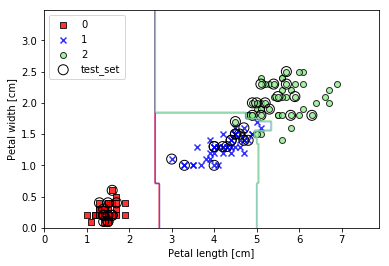

In [33]:
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc = 'upper left')
plt.show()